In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/Fraud.csv")

In [3]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
20680,8,PAYMENT,11596.30,C92878260,822636.55,811040.25,M213876624,0.00,0.00,0.0,0.0
43779,9,CASH_OUT,185145.38,C108647801,194.00,0.00,C380047492,5013.00,190158.38,0.0,0.0
40919,9,CASH_OUT,298705.34,C63687113,0.00,0.00,C1883840933,25330272.63,25628977.96,0.0,0.0
9820,7,PAYMENT,11045.61,C543835743,24663.00,13617.39,M206608194,0.00,0.00,0.0,0.0
22067,8,PAYMENT,4013.65,C733834986,64192.88,60179.24,M509377466,0.00,0.00,0.0,0.0
69807,9,CASH_IN,128989.07,C712810461,3481225.68,3610214.75,C889098074,0.00,0.00,0.0,0.0
11768,7,TRANSFER,641342.41,C127865470,0.00,0.00,C1297685781,1120608.72,3258726.36,0.0,0.0
59535,9,CASH_IN,231876.00,C629509242,21618.00,253494.00,C1827845688,0.00,0.00,0.0,0.0
35709,9,PAYMENT,18195.05,C1868221658,0.00,0.00,M2020482224,0.00,0.00,0.0,0.0
55684,9,PAYMENT,29307.21,C2145559409,30011.00,703.79,M11961517,0.00,0.00,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69858 entries, 0 to 69857
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            69858 non-null  int64  
 1   type            69858 non-null  object 
 2   amount          69858 non-null  float64
 3   nameOrig        69858 non-null  object 
 4   oldbalanceOrg   69858 non-null  float64
 5   newbalanceOrig  69858 non-null  float64
 6   nameDest        69858 non-null  object 
 7   oldbalanceDest  69858 non-null  float64
 8   newbalanceDest  69857 non-null  float64
 9   isFraud         69857 non-null  float64
 10  isFlaggedFraud  69857 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 5.9+ MB


In [5]:
df.isnull().sum().sum()

np.int64(3)

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [8]:
df['isFraud'] = df['isFraud'].astype(int)
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(int)
df[['isFraud', 'isFlaggedFraud']].dtypes

,0
isFraud,int64
isFlaggedFraud,int64


In [9]:
df.shape

(69857, 11)

In [10]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
df["isFraud"].value_counts()

,count
isFraud,
0,69750
1,107


In [12]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,69857


In [13]:
df.shape

(69857, 11)

As we can  see that how imbalanced this data is as the fraud rate of 1 is just 0.08 percent.


In [14]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100, 2)

np.float64(0.15)

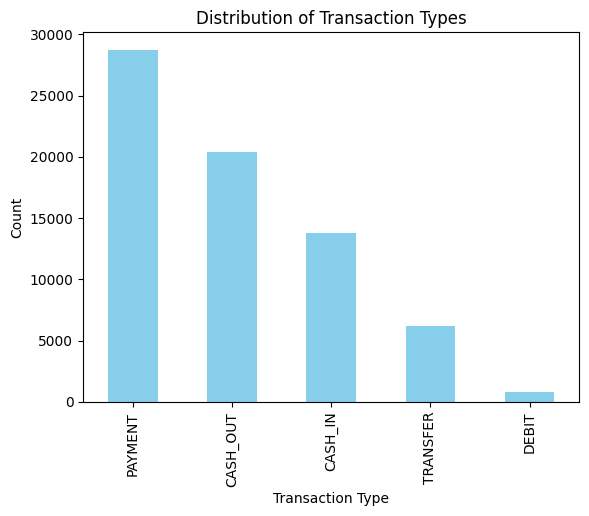

In [15]:
df['type'].value_counts().plot(kind = 'bar', color = "skyblue" )
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [16]:
fraud_transactions = df[df['isFraud'] == 1]
fraud_counts_by_type = fraud_transactions['type'].value_counts()
total_transactions_by_type = df['type'].value_counts()
fraud_rate_by_type = fraud_counts_by_type / total_transactions_by_type
fraud_rate_by_type.sort_values(ascending=False)

,count
type,
TRANSFER,0.008586
CASH_OUT,0.002648
CASH_IN,NaN
DEBIT,NaN
PAYMENT,NaN


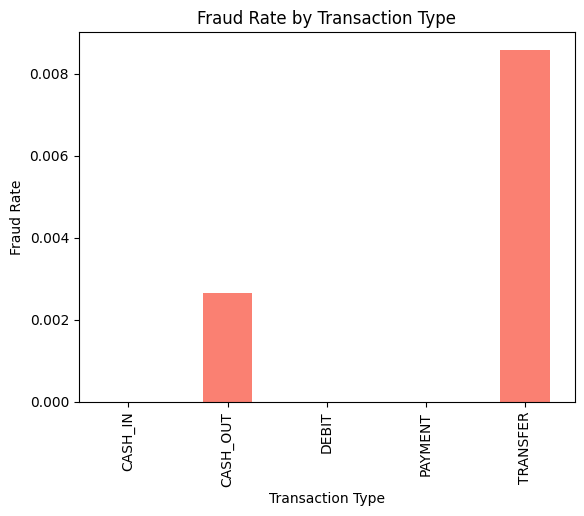

In [17]:
fraud_rate_by_type.plot(kind='bar', color = "salmon")
plt.title('Fraud Rate by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate')
plt.show()

In [18]:
df['amount'].describe().astype(int)

,amount
count,69857
mean,164019
std,331374
min,0
25%,9011
50%,44057
75%,199132
max,10000000


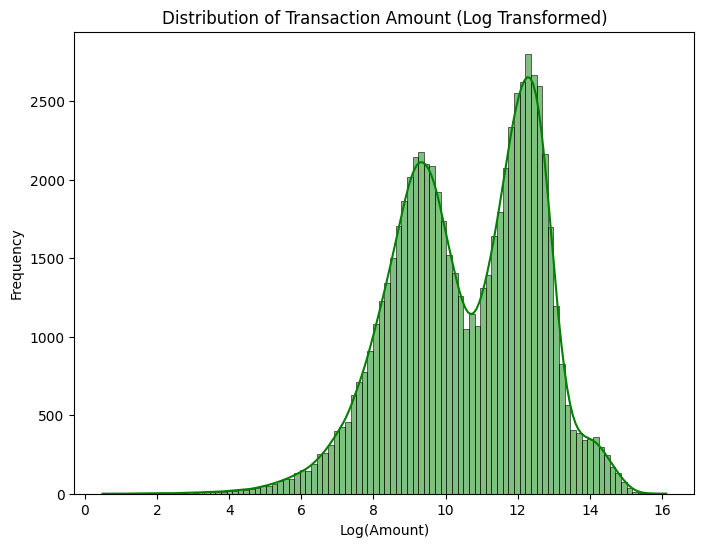

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(np.log1p(df['amount']), bins=100, kde=True, color='green')
plt.title('Distribution of Transaction Amount (Log Transformed)')
plt.xlabel('Log(Amount)')
plt.ylabel('Frequency')
plt.show()

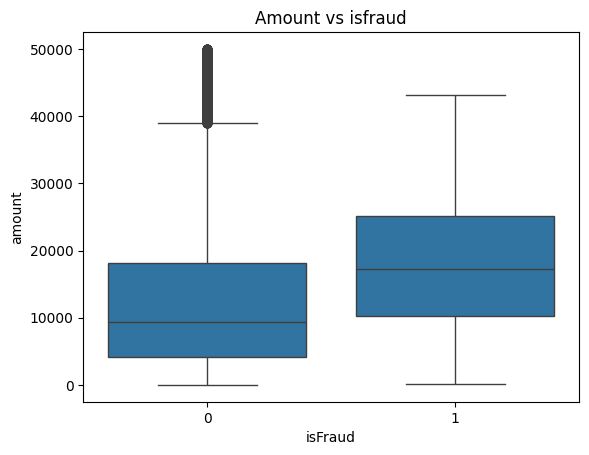

In [20]:
sns.boxplot(data = df[df['amount'] < 50000], x = "isFraud", y = "amount")
plt.title("Amount vs isfraud")
plt.show()

In [21]:
df['orig_balance_change'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['dest_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']

In [22]:
(df["orig_balance_change"] < 0).sum()

np.int64(34714)

In [23]:
(df["dest_balance_change"] < 0).sum()

np.int64(13069)

In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orig_balance_change,dest_balance_change
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [25]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'orig_balance_change', 'dest_balance_change'],
      dtype='object')

In [26]:
fraud_user = df[df['isFraud'] == 1]["nameOrig"].value_counts()

In [27]:
fraud_user.head(10)

,count
nameOrig,
C1305486145,1
C840083671,1
C1420196421,1
C2101527076,1
C137533655,1
C1118430673,1
C749981943,1
C1334405552,1
C467632528,1


In [28]:
fraud_type = df[df['type'].isin(["TRANSFER", "CASH_OUT"])]

In [29]:
fraud_type.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orig_balance_change,dest_balance_change
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0,-181.0,0.0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0,-181.0,-21182.0


In [30]:
fraud_type["type"].value_counts()

,count
type,
CASH_OUT,20389
TRANSFER,6173


In [31]:
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
correlation_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orig_balance_change,dest_balance_change
step,1.000000,0.078138,0.006637,0.006260,0.000887,0.015396,-0.051862,NaN,-0.006099,0.038752
amount,0.078138,1.000000,-0.001700,-0.008403,0.268005,0.389110,0.047712,NaN,-0.142930,0.435958
oldbalanceOrg,0.006637,-0.001700,1.000000,0.998970,0.108261,0.075372,-0.004517,NaN,0.265436,-0.040242
newbalanceOrig,0.006260,-0.008403,0.998970,1.000000,0.110350,0.074976,-0.012301,NaN,0.308908,-0.045912
oldbalanceDest,0.000887,0.268005,0.108261,0.110350,1.000000,0.930480,-0.010576,NaN,0.075501,0.247832
newbalanceDest,0.015396,0.389110,0.075372,0.074976,0.930480,1.000000,-0.007152,NaN,0.013252,0.585516
isFraud,-0.051862,0.047712,-0.004517,-0.012301,-0.010576,-0.007152,1.000000,NaN,-0.166698,0.004488
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
orig_balance_change,-0.006099,-0.142930,0.265436,0.308908,0.075501,0.013252,-0.166698,NaN,1.000000,-0.132028
dest_balance_change,0.038752,0.435958,-0.040242,-0.045912,0.247832,0.585516,0.004488,NaN,-0.132028,1.000000


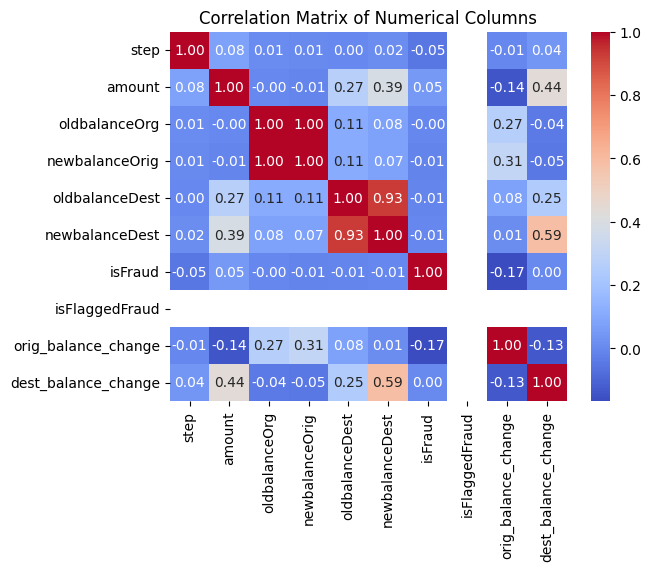

In [32]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [33]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'orig_balance_change', 'dest_balance_change'],
      dtype='object')

In [34]:
zero_balance_df = df[(df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0) & (df['type'].isin(["TRANSFER","CASH_OUT"]))]

In [35]:
len(zero_balance_df)

13662

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

In [37]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'orig_balance_change', 'dest_balance_change'],
      dtype='object')

In [38]:
df = df.drop(['step', 'nameDest', 'nameOrig', 'isFlaggedFraud'], axis=1)

In [39]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'orig_balance_change',
       'dest_balance_change'],
      dtype='object')

In [40]:
categorical_cols = ['type']
numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'orig_balance_change', 'dest_balance_change']
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orig_balance_change,dest_balance_change
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,-9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,-1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,-181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,-181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,-11668.14,0.0


In [41]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (48899, 8)
Shape of X_test: (20958, 8)
Shape of y_train: (48899,)
Shape of y_test: (20958,)


In [42]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

In [43]:
pipeline = Pipeline([('prep', preprocessor),
                     ('classifier', LogisticRegression(class_weight="balanced"))])

print("Pipeline created successfully!")

Pipeline created successfully!


In [44]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'orig_balance_change',
                                                   'dest_balance_change']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['type'])])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [45]:
y_pred = pipeline.predict(X_test)

In [46]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nPipeline Score (Accuracy): {pipeline.score(X_test, y_test):.4f}")

Confusion Matrix:
[[18933  1993]
 [    2    30]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     20926
           1       0.01      0.94      0.03        32

    accuracy                           0.90     20958
   macro avg       0.51      0.92      0.49     20958
weighted avg       1.00      0.90      0.95     20958


Pipeline Score (Accuracy): 0.9048


As seen in the metrics, the precision is very low, which can be further improved through techniques for imbalanced data such as SMOTE or oversampling. Overall, the accuracy is good, but it definitely needs improvement in that area.


In [47]:
%pip install imbalanced-learn

In [48]:
from imblearn.over_sampling import SMOTE

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train_processed, y_train)

pipeline_with_smote = Pipeline([('classifier', LogisticRegression(class_weight="balanced"))])

pipeline_with_smote.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('classifier', LogisticRegression(class_weight='balanced'))])

In [49]:
y_pred_smote = pipeline_with_smote.predict(X_test_processed)

print("Confusion Matrix (with SMOTE):")
print(confusion_matrix(y_test, y_pred_smote))

print("\nClassification Report (with SMOTE):")
print(classification_report(y_test, y_pred_smote))

print(f"\nPipeline Score (Accuracy with SMOTE): {pipeline_with_smote.score(X_test_processed, y_test):.4f}")

Confusion Matrix (with SMOTE):
[[19317  1609]
 [    2    30]]

Classification Report (with SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96     20926
           1       0.02      0.94      0.04        32

    accuracy                           0.92     20958
   macro avg       0.51      0.93      0.50     20958
weighted avg       1.00      0.92      0.96     20958


Pipeline Score (Accuracy with SMOTE): 0.9231


In [50]:
import joblib

joblib.dump(pipeline, 'pipeline_with_smote.pkl')

['pipeline_with_smote.pkl']